# 184.702 Machine Learning 2019S
## Assignment 1: Classification experiments
#### Prepared by: Aleksandra Radecka (e11847505), Niklas Speckle (e1515258) and Nazika Moeininia (e1535524)

### 1. Aim of the exercise

### 2. Datasets' description

In [1]:
##1 importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50

In [2]:
##2 creating pdDataFrame
kick_ds = pd.read_csv(r"C:\Users\aleks\Documents\9_TU_Wien\4_Machine_Learning\kick_dataset\kick.csv")

In [3]:
##3 cleaning pdDataFrame
# transforming empty cells to no data values
cols=kick_ds.columns
for elem in cols:
    kick_ds[elem] = kick_ds[elem].replace("?", np.nan)

In [4]:
# transforming dtypes (object dtype to int, float, date, categorical) 
num_cols=["VehYear", "VehicleAge", "VehOdo", "MMRAcquisitionAuctionAveragePrice", \
    "MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionRetailAveragePrice", "MMRAcquisitonRetailCleanPrice", \
        "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice", "MMRCurrentRetailAveragePrice", \
            "MMRCurrentRetailCleanPrice", "BYRNO", "VehBCost", "WarrantyCost"]
cat_cols=["IsBadBuy", "Auction", "Make", "Model", "Trim", "SubModel", "Color", \
    "Transmission", "WheelTypeID", "WheelType", "Nationality", "Size", "TopThreeAmericanName", \
        "PRIMEUNIT", "AUCGUART", "VNZIP1", "VNST", "IsOnlineSale"]
str_cols=["Auction", "Make", "Model", "Trim", "SubModel", "Color", \
    "Transmission", "WheelType", "Nationality", "Size", "TopThreeAmericanName", \
        "PRIMEUNIT", "AUCGUART", "VNST"] #str_cols is the subset of cat_cols, the ones being a text

In [5]:
for elem in num_cols:
    kick_ds[elem] = pd.to_numeric(kick_ds[elem])

for elem in cat_cols:
    kick_ds[elem] = kick_ds[elem].astype("category")

kick_ds["PurchDate"] = pd.to_datetime(kick_ds["PurchDate"])

In [6]:
# converting all categorical string (text) values to uppercase
for elem in str_cols:
    kick_ds[elem] = kick_ds[elem].str.upper()

In [7]:
##4 info about each feature
# feature's data type
kick_ds.dtypes

IsBadBuy                                   category
PurchDate                            datetime64[ns]
Auction                                      object
VehYear                                       int64
VehicleAge                                    int64
Make                                         object
Model                                        object
Trim                                         object
SubModel                                     object
Color                                        object
Transmission                                 object
WheelTypeID                                category
WheelType                                    object
VehOdo                                        int64
Nationality                                  object
Size                                         object
TopThreeAmericanName                         object
MMRAcquisitionAuctionAveragePrice           float64
MMRAcquisitionAuctionCleanPrice             float64
MMRAcquisiti

In [8]:
# number of missing values in each feature
mv = kick_ds.isna().sum()
mv

IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentR

In [9]:
# statistics for numeric features
kick_ds.describe()

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72915.000000,72983.000000
mean,2005.343052,4.176644,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,6729.249949,1276.580985
std,1.731252,1.712210,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,1764.962643,598.846788
min,2001.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,1.000000,462.000000
25%,2004.000000,3.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,5430.000000,837.000000
50%,2005.000000,4.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,6700.000000,1155.000000
75%,2007.000000,5.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,7900.000000,1623.000000
max,2010.000000,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,45469.000000,7498.000000


In [10]:
# statistics for category features
kick_ds[cat_cols].describe()

,IsBadBuy,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNZIP1,VNST,IsOnlineSale
count,72983,72983,72983,72983,70623,72975,72975,72974,69814,69809,72978,72978,72978,3419,3419,72983,72983,72983
unique,2,3,33,1063,133,863,16,2,4,3,4,12,4,2,2,153,37,2
top,0,MANHEIM,CHEVROLET,PT CRUISER,BAS,4D SEDAN,SILVER,AUTO,1,ALLOY,AMERICAN,MEDIUM,GM,NO,GREEN,32824,TX,0
freq,64007,41043,17248,2329,13950,15236,14875,70398,36050,36050,61028,30785,25314,3357,3340,3699,13596,71138


In [11]:
##5 general info about the dataset
# number of samples
n_samples = kick_ds.shape[0]
n_samples

72983

In [12]:
# number of features (attributes)
n_att = kick_ds.shape[1]
n_att

33

In [13]:
# number of classes == unique values in the selected attribute 
n_cl = kick_ds.loc[:,"IsBadBuy"].unique().shape[0]
n_cl

2

In [14]:
# missing values => how many mv present in ds, in how many features
np.sum(mv), mv[mv.values!=0].shape[0]

(149271, 20)

In [15]:
##6 graphs
# graphs for category features - "IsBadBuy" and "Make"
prop_tables = []
for variable in cat_cols:
    tab = pd.crosstab(kick_ds[variable], columns="count")
    rel_tab = tab/tab.sum()
    prop_tables.append(rel_tab)

prop_tables[0]

col_0,count
IsBadBuy,
0,0.877012
1,0.122988


In [16]:
prop_tables[2]

col_0,count
Make,
ACURA,0.000452
BUICK,0.009865
CADILLAC,0.000452
CHEVROLET,0.236329
CHRYSLER,0.121179
DODGE,0.176918
FORD,0.154899
GMC,0.008892
HONDA,0.006810


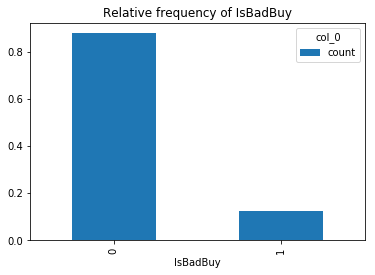

In [17]:
prop_tables[0].plot(kind="bar",title="Relative frequency of IsBadBuy")

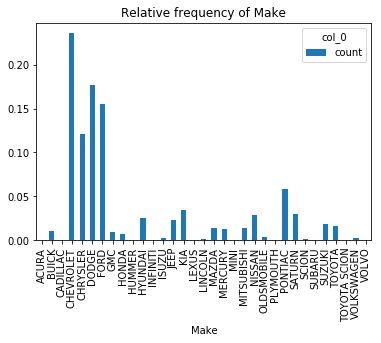

In [18]:
prop_tables[2].plot(kind="bar", title="Relative frequency of Make")

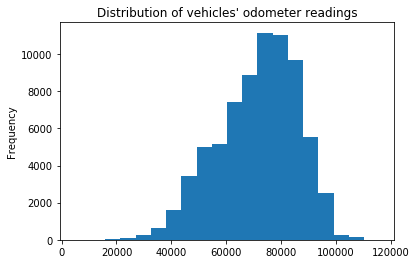

In [19]:
# graphs for numeric features - "VehOdo" and "VehBCost"
kick_ds.VehOdo.plot(kind="hist", title="Distribution of vehicles' odometer readings", bins = 20)

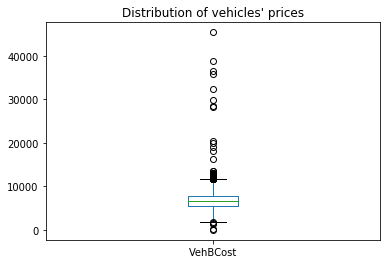

In [20]:
kick_ds.VehBCost.plot(kind="box", title="Distribution of vehicles' prices")

### 3. Selected classifiers and performance measures

### 4. Classifications

In [21]:
##1 importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score

In [22]:
##2 selecting a sample of data
kick_ds_s = kick_ds.sample(frac=0.01, random_state=100)

In [23]:
##3 defining target class feature (Ydata) and explanatory features (Xdata)
# "IsBadBuy" feature
Ydata_s = kick_ds_s.iloc[:,0]
"""
All features apart from "PurchDate", "VehYear" (both correlated with VehicleAge), 
"WheelTypeID" (directly correlated with WheelType) 
and "VNST" (correlated with "VNZIP1 and less detailed than it)"
"""
Xdata_s = kick_ds_s.iloc[:,[2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32]]

#### 4.1. kNN classifier implementation

In [24]:
# preprocessing 
# imputation to complete missing values
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Xdata_s_imp = pd.DataFrame(imp.fit_transform(Xdata_s))
Xdata_s_imp.columns = Xdata_s.columns
Xdata_s_imp.index = Xdata_s.index

In [25]:
# just to check that it works
Xdata_s_imp.isna().sum()

Auction                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
PRIMEUNIT                            0
AUCGUART                             0
BYRNO                                0
VNZIP1                               0
VehBCost                 

In [26]:
# once again transforming dtypes 
num_cols2=["VehicleAge", "VehOdo", "MMRAcquisitionAuctionAveragePrice", \
    "MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionRetailAveragePrice", "MMRAcquisitonRetailCleanPrice", \
        "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice", "MMRCurrentRetailAveragePrice", \
            "MMRCurrentRetailCleanPrice", "BYRNO", "VehBCost", "WarrantyCost"]
cat_cols2=["Auction", "Make", "Model", "Trim", "SubModel", "Color", \
    "Transmission", "WheelType", "Nationality", "Size", "TopThreeAmericanName", \
        "PRIMEUNIT", "AUCGUART", "VNZIP1", "IsOnlineSale"]
for elem in num_cols2:
    Xdata_s_imp[elem] = pd.to_numeric(Xdata_s_imp[elem])
for elem in cat_cols2:
    Xdata_s_imp[elem] = Xdata_s_imp[elem].astype("category")
Xdata_s_imp.dtypes

Auction                              category
VehicleAge                              int64
Make                                 category
Model                                category
Trim                                 category
SubModel                             category
Color                                category
Transmission                         category
WheelType                            category
VehOdo                                  int64
Nationality                          category
Size                                 category
TopThreeAmericanName                 category
MMRAcquisitionAuctionAveragePrice     float64
MMRAcquisitionAuctionCleanPrice       float64
MMRAcquisitionRetailAveragePrice      float64
MMRAcquisitonRetailCleanPrice         float64
MMRCurrentAuctionAveragePrice         float64
MMRCurrentAuctionCleanPrice           float64
MMRCurrentRetailAveragePrice          float64
MMRCurrentRetailCleanPrice            float64
PRIMEUNIT                         

In [27]:
# dummy encoding needed to calculate distance (automatically only for categorical)
Xdata_s_imp_dummy = pd.get_dummies(Xdata_s_imp)

In [28]:
# function to experiment with kNN
def knn_test(Xdata, Ydata, weights = "uniform", algorithm = "brute"):
    accuracy_mean = []
    accuracy_std = []
    fit_time = []
    score_time = []
    precision_mean = []
    precision_std = []
    recall_mean = []
    recall_std = []
    
    ### metrics for our analysis
    scoring = ["accuracy", "precision_micro", "recall_micro"]
    for i in range(2,101):
        knn = KNeighborsClassifier(i, weights=weights, algorithm = algorithm)
        scores = cross_validate(knn, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
        accuracy_mean.append(scores["test_accuracy"].mean())
        accuracy_std.append(scores["test_accuracy"].std())
        fit_time.append(scores["fit_time"].mean())
        score_time.append(scores["score_time"].mean())
        precision_mean.append(scores["test_precision_micro"].mean())
        precision_std.append(scores["test_precision_micro"].std())
        recall_mean.append(scores["test_recall_micro"].mean())
        recall_std.append(scores["test_recall_micro"].std())
        
    #Plot
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(accuracy_mean)
    plt.plot(accuracy_std)
    plt.title("Accuracy")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,2)
    plt.plot(precision_mean)
    plt.plot(precision_std)
    plt.title("Precision")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,3)
    plt.plot(recall_mean)
    plt.plot(recall_std)
    plt.title("Recall")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,4)
    plt.plot(fit_time)
    plt.plot(score_time)
    plt.title("Time")
    plt.xlabel("k")
    plt.legend(("Fit Time", "Score Time"))

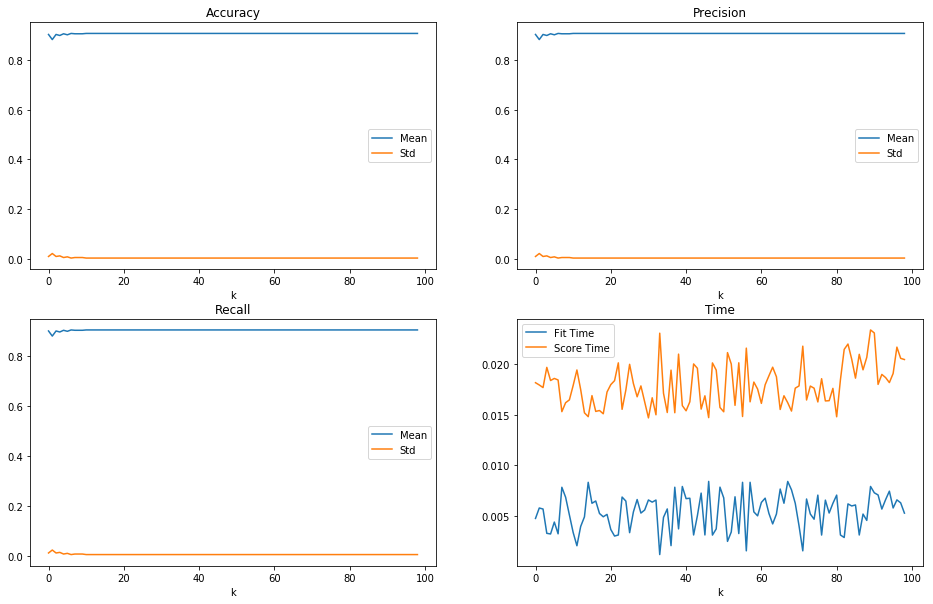

In [29]:
# approach 1: weights uniform, algorithm brute, values source
knn_test(Xdata_s_imp_dummy, Ydata_s, weights="uniform", algorithm="brute")

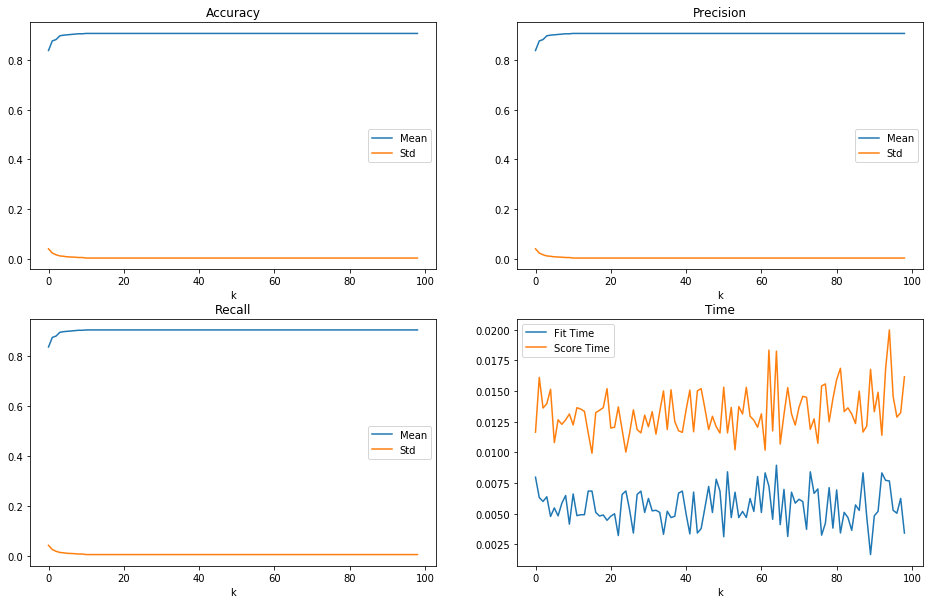

In [30]:
# approach 2: weights distance, algorithm brute, values source
knn_test(Xdata_s_imp_dummy, Ydata_s, weights="distance", algorithm="brute")

C:\OSGEO4~1\apps\Python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


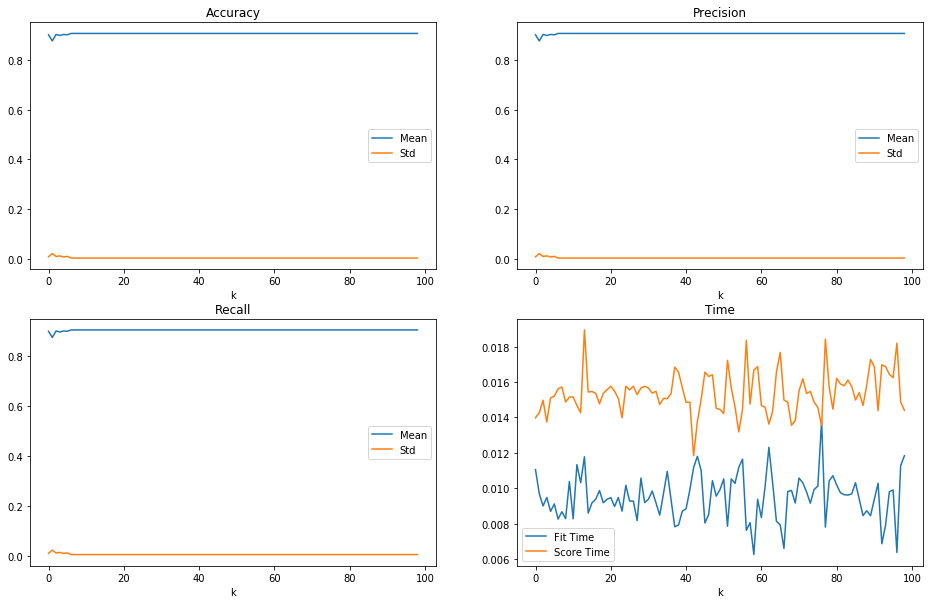

In [31]:
# approach 3: weights uniform, algorithm brute, values scaled
# min-max scaling
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata_s_imp_dummy)

knn_test(X_minmax, Ydata_s, weights="uniform", algorithm="brute")

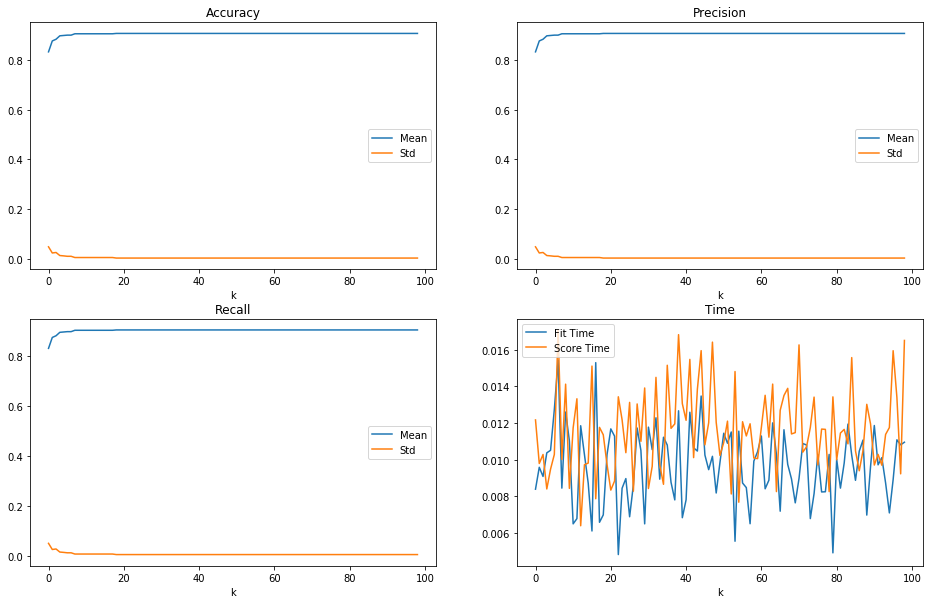

In [32]:
# approach 4: weights distance, algorithm brute, values scaled
knn_test(X_minmax, Ydata_s, weights="distance", algorithm = "brute")

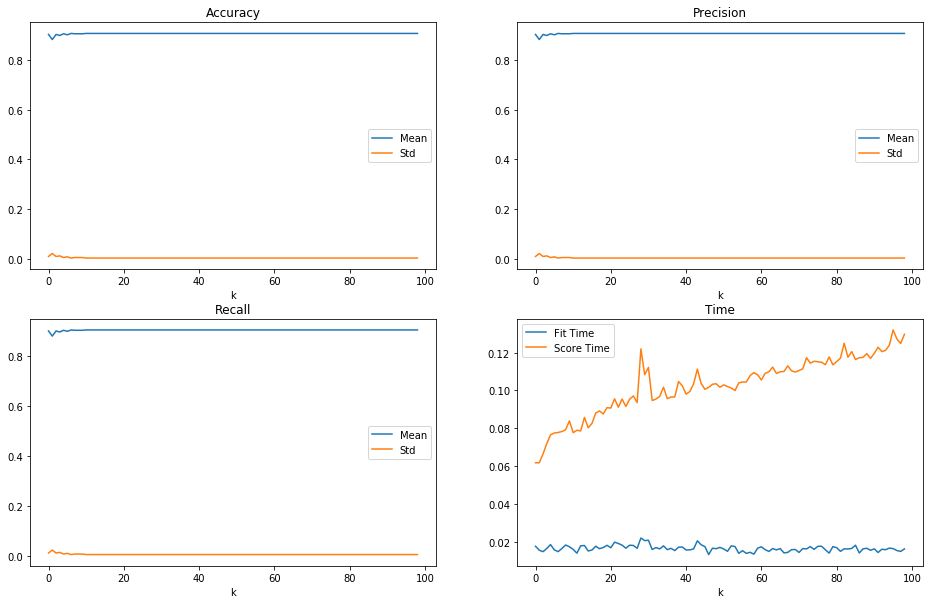

In [33]:
# approach 5: weights uniform, algorithm kd_tree, values source
knn_test(Xdata_s_imp_dummy, Ydata_s, weights="uniform", algorithm="kd_tree")

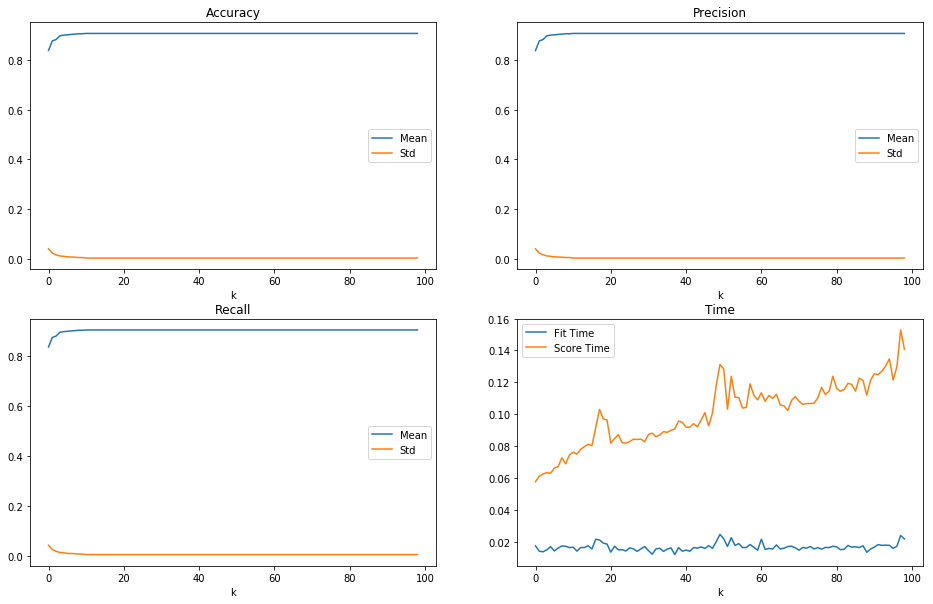

In [34]:
# approach 6: weights distance, algorithm kd_tree, values source
knn_test(Xdata_s_imp_dummy, Ydata_s, weights="distance", algorithm="kd_tree")

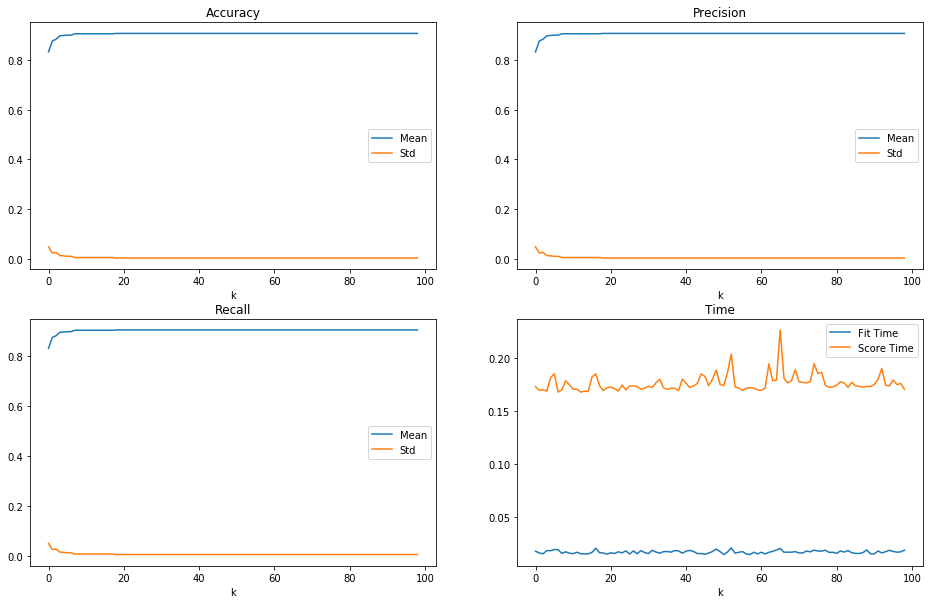

In [35]:
# approach 7: weights distance, algorithm kd_tree, values scaled
knn_test(X_minmax, Ydata_s, weights="distance", algorithm="kd_tree")

In [ ]:
# approach 8: weights uniform, algorithm kd_tree, values scaled
knn_test(X_minmax, Ydata_s, weights="uniform", algorithm="kd_tree")

#### 4.2. Naive Bayes classifier implementation

#### 4.3. Random Forest classifier implementation

In [27]:
# function to experiment with RF
def test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 2, min_samples_leaf = 1):
    scoring = ["accuracy", "precision_micro", "recall_micro"]
    accuracy_mean = []
    accuracy_std = []
    fit_time = []
    score_time = []
    precision_mean = []
    precision_std = []
    recall_mean = []
    recall_std = []
    
    xaxis = []
    
    for i in range(10, 201, 10):
        xaxis.append(i)
    
    for i in range(10, 201, 10):
        rfc = RandomForestClassifier(n_estimators=i, criterion=criterion, min_samples_split=min_samples_split)
        scores = cross_validate(rfc, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
    
        accuracy_mean.append(scores["test_accuracy"].mean())
        accuracy_std.append(scores["test_accuracy"].std())
        fit_time.append(scores["fit_time"].mean())
        score_time.append(scores["score_time"].mean())
        precision_mean.append(scores["test_precision_micro"].mean())
        precision_std.append(scores["test_precision_micro"].std())
        recall_mean.append(scores["test_recall_micro"].mean())
        recall_std.append(scores["test_recall_micro"].std())
    
    ### Summary Plot
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(xaxis, accuracy_mean)
    plt.plot(xaxis, accuracy_std)
    plt.title("Accuracy")
    plt.xlabel("Number of estimators")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,2)
    plt.plot(xaxis, precision_mean)
    plt.plot(xaxis, precision_std)
    plt.title("Precision")
    plt.xlabel("Number of estimators")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,3)
    plt.plot(xaxis, recall_mean)
    plt.plot(xaxis, recall_std)
    plt.title("Recall")
    plt.xlabel("Number of estimators")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,4)
    plt.plot(xaxis, fit_time)
    plt.plot(xaxis, score_time)
    plt.title("Time")
    plt.xlabel("Number of estimators")
    plt.legend(("Fit Time", "Score Time"))

In [ ]:
# aproach 1: criterion gini, min_sample_split 2
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "gini", min_samples_split = 2, min_samples_leaf = 1)

In [ ]:
# aproach 2: criterion gini, min_sample_split 5
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "gini", min_samples_split = 5, min_samples_leaf = 1)

In [ ]:
# aproach 3: criterion gini, min_sample_split 10
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "gini", min_samples_split = 10, min_samples_leaf = 1)

In [ ]:
# aproach 4: criterion entropy, min_sample_split 2
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "entropy", min_samples_split = 2, min_samples_leaf = 1)

In [ ]:
# aproach 5: criterion entropy, min_sample_split 5
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "entropy", min_samples_split = 5, min_samples_leaf = 1)

In [ ]:
# aproach 6: criterion entropy, min_sample_split 10
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "entropy", min_samples_split = 10, min_samples_leaf = 1)

### 5. Conclusions